
[Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) - place csv file in /src/data


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('./data/creditcard.csv')

In [33]:
from sklearn.model_selection import train_test_split


# stratified split
positive_cases = dataset[dataset['Class'] == 1]
negative_cases = dataset[dataset['Class'] == 0]

train_pos, test_pos = train_test_split(positive_cases, test_size=0.2, random_state=42)
train_neg, test_neg = train_test_split(negative_cases, test_size=0.2, random_state=42)

train_pos_X, train_pos_y = train_pos.drop('Class', axis=1), train_pos['Class']
train_neg_X, train_neg_y = train_neg.drop('Class', axis=1), train_neg['Class']

test_pos_X, test_pos_y = test_pos.drop('Class', axis=1), test_pos['Class']
test_neg_X, test_neg_y = test_neg.drop('Class', axis=1), test_neg['Class']

train_X = pd.concat([train_pos_X, train_neg_X])
train_y = pd.concat([train_pos_y, train_neg_y])

test_X = pd.concat([test_pos_X, test_neg_X])
test_y = pd.concat([test_pos_y, test_neg_y])

In [22]:

import numpy as np
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

def recall(y_true, y_pred):
    tp, tn, fp, fn = confusion_matrix(y_true, y_pred)
    return tp / (tp + fn)

def precision(y_true, y_pred):
    tp, tn, fp, fn = confusion_matrix(y_true, y_pred)
    if tp + fp == 0:
        return 0
    return tp / (tp + fp)

def f1score(y_true, y_pred):
    rec = recall(y_true, y_pred)
    prec = precision(y_true, y_pred)
    return 2 * (rec * prec) / (rec + prec)

In [65]:
def roc(y_true, y_pred, n = 200):
    thresholds = np.linspace(0, 1, n)
    points_x = []
    points_y = []
    for threshold in thresholds[1:]:
        y_pred_binary = (y_pred > threshold).astype(int)
        # print(y_pred_binary)
        tpr = precision(y_true, y_pred_binary)
        fpr = recall(y_true, y_pred_binary)
        # print(f'threshold: {threshold}, tpr: {tpr}, fpr: {fpr}')
        points_x.append(1-fpr)
        points_y.append(tpr)

    return points_x, points_y

def plot_roc(y_true, y_pred):
    points_x, points_y = roc(y_true, y_pred)
    plt.plot(points_x, points_y)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    

/home/rafal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


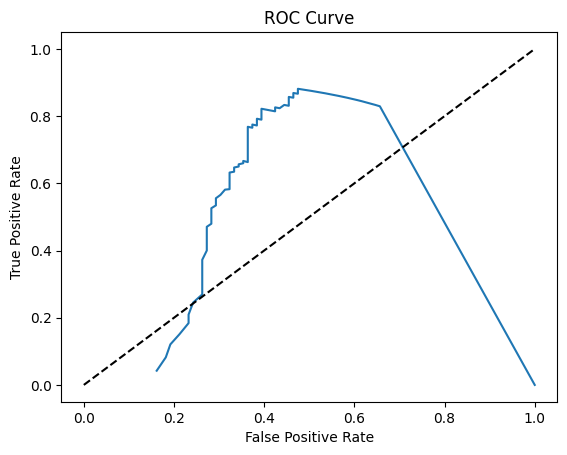

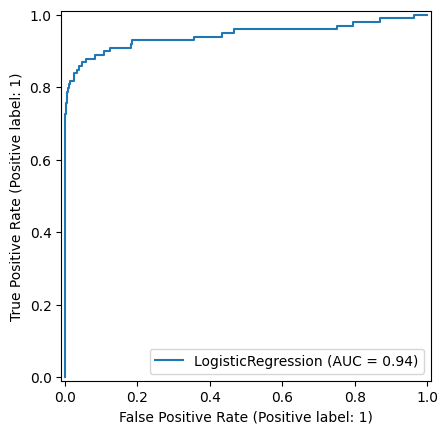

In [70]:
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay


model = LogisticRegression(max_iter=200)
model.fit(train_X, train_y)

predictions = model.predict_proba(test_X)[:, 1]

plot_roc(test_y, predictions)

roc_display = RocCurveDisplay.from_estimator(model, test_X, test_y)
# roc_display.plot()

# print(classification_report(test_y, predictions))